In [55]:
import pandas as pd
a = pd.read_csv('/content/drive/MyDrive/breast_cancer_survival (1).csv')
print(a)

     Age  Gender  Protein1  Protein2  Protein3  Protein4 Tumour_Stage  \
0     42  FEMALE  0.952560   2.15000  0.007972 -0.048340           II   
1     54  FEMALE  0.000000   1.38020 -0.498030 -0.507320           II   
2     63  FEMALE -0.523030   1.76400 -0.370190  0.010815           II   
3     78  FEMALE -0.876180   0.12943 -0.370380  0.132190            I   
4     42  FEMALE  0.226110   1.74910 -0.543970 -0.390210           II   
..   ...     ...       ...       ...       ...       ...          ...   
329   59  FEMALE  0.024598   1.40050  0.024751  0.280320           II   
330   41  FEMALE  0.100120  -0.46547  0.472370 -0.523870            I   
331   54  FEMALE  0.753820   1.64250 -0.332850  0.857860           II   
332   74  FEMALE  0.972510   1.42680 -0.366570 -0.107820           II   
333   66  FEMALE  0.286380   1.39980  0.318830  0.836050           II   

                          Histology ER status PR status HER2 status  \
0     Infiltrating Ductal Carcinoma  Positive  Posit

In [56]:
a=a.drop(columns=['Histology','Surgery_type','Date_of_Surgery','Date_of_Last_Visit'],axis=1)
print(a)

     Age  Gender  Protein1  Protein2  Protein3  Protein4 Tumour_Stage  \
0     42  FEMALE  0.952560   2.15000  0.007972 -0.048340           II   
1     54  FEMALE  0.000000   1.38020 -0.498030 -0.507320           II   
2     63  FEMALE -0.523030   1.76400 -0.370190  0.010815           II   
3     78  FEMALE -0.876180   0.12943 -0.370380  0.132190            I   
4     42  FEMALE  0.226110   1.74910 -0.543970 -0.390210           II   
..   ...     ...       ...       ...       ...       ...          ...   
329   59  FEMALE  0.024598   1.40050  0.024751  0.280320           II   
330   41  FEMALE  0.100120  -0.46547  0.472370 -0.523870            I   
331   54  FEMALE  0.753820   1.64250 -0.332850  0.857860           II   
332   74  FEMALE  0.972510   1.42680 -0.366570 -0.107820           II   
333   66  FEMALE  0.286380   1.39980  0.318830  0.836050           II   

    ER status PR status HER2 status Patient_Status  
0    Positive  Positive    Negative          Alive  
1    Positive  Po

In [57]:
columns_to_replace= ['ER status', 'PR status', 'HER2 status']
a[columns_to_replace] = a[columns_to_replace].replace({'Positive': 1, 'Negative': 0})
a['Tumour_Stage'] = a['Tumour_Stage'].replace({'I':1,'II':2,'III':3,'IV':4})
a['Gender'] = a['Gender'].replace({'MALE':1,'FEMALE':0})
a['Patient_Status']= a['Patient_Status'].replace({'Alive':1,'Dead':0})
print(a)

     Age  Gender  Protein1  Protein2  Protein3  Protein4  Tumour_Stage  \
0     42       0  0.952560   2.15000  0.007972 -0.048340             2   
1     54       0  0.000000   1.38020 -0.498030 -0.507320             2   
2     63       0 -0.523030   1.76400 -0.370190  0.010815             2   
3     78       0 -0.876180   0.12943 -0.370380  0.132190             1   
4     42       0  0.226110   1.74910 -0.543970 -0.390210             2   
..   ...     ...       ...       ...       ...       ...           ...   
329   59       0  0.024598   1.40050  0.024751  0.280320             2   
330   41       0  0.100120  -0.46547  0.472370 -0.523870             1   
331   54       0  0.753820   1.64250 -0.332850  0.857860             2   
332   74       0  0.972510   1.42680 -0.366570 -0.107820             2   
333   66       0  0.286380   1.39980  0.318830  0.836050             2   

     ER status  PR status  HER2 status  Patient_Status  
0            1          1            0             1.0

In [61]:
import numpy as np
X=a.drop(columns=['Patient_Status','Gender'],axis=1)
y=a['Patient_Status']

round_Values=round(a.Patient_Status.mean())
a.Patient_Status=a.Patient_Status.fillna(round_Values)

print(X)
print(y)

     Age  Protein1  Protein2  Protein3  Protein4  Tumour_Stage  ER status  \
0     42  0.952560   2.15000  0.007972 -0.048340             2          1   
1     54  0.000000   1.38020 -0.498030 -0.507320             2          1   
2     63 -0.523030   1.76400 -0.370190  0.010815             2          1   
3     78 -0.876180   0.12943 -0.370380  0.132190             1          1   
4     42  0.226110   1.74910 -0.543970 -0.390210             2          1   
..   ...       ...       ...       ...       ...           ...        ...   
329   59  0.024598   1.40050  0.024751  0.280320             2          1   
330   41  0.100120  -0.46547  0.472370 -0.523870             1          1   
331   54  0.753820   1.64250 -0.332850  0.857860             2          1   
332   74  0.972510   1.42680 -0.366570 -0.107820             2          1   
333   66  0.286380   1.39980  0.318830  0.836050             2          1   

     PR status  HER2 status  
0            1            0  
1            1 

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
accuracy_list = []
for i in range(2,20):
  knn_classifier = KNeighborsClassifier(n_neighbors=i)
  knn_classifier.fit(X_train,y_train)
  y_pred = knn_classifier.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  print("Accuracy for k = ",i,"is :",accuracy*100)
  accuracy_list.append(accuracy*100)

Accuracy for k =  2 is : 60.396039603960396
Accuracy for k =  3 is : 82.17821782178217
Accuracy for k =  4 is : 77.22772277227723
Accuracy for k =  5 is : 81.1881188118812
Accuracy for k =  6 is : 80.19801980198021
Accuracy for k =  7 is : 80.19801980198021
Accuracy for k =  8 is : 79.20792079207921
Accuracy for k =  9 is : 80.19801980198021
Accuracy for k =  10 is : 79.20792079207921
Accuracy for k =  11 is : 80.19801980198021
Accuracy for k =  12 is : 80.19801980198021
Accuracy for k =  13 is : 80.19801980198021
Accuracy for k =  14 is : 80.19801980198021
Accuracy for k =  15 is : 80.19801980198021
Accuracy for k =  16 is : 80.19801980198021
Accuracy for k =  17 is : 80.19801980198021
Accuracy for k =  18 is : 80.19801980198021
Accuracy for k =  19 is : 80.19801980198021


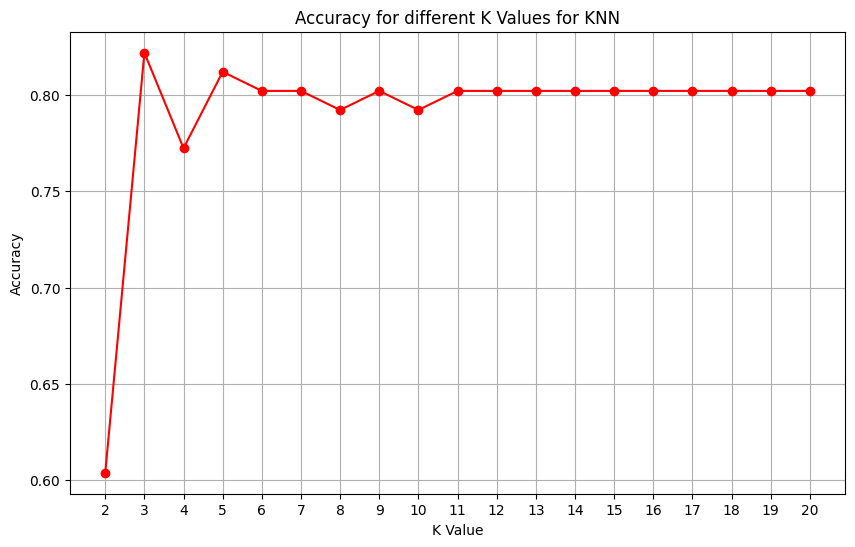

In [70]:
import matplotlib.pyplot as plt
import numpy as np

k_values = list(range(2, 21))
accuracies = []

for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, y_train)
    y_pred = knn_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='r')
plt.title('Accuracy for different K Values for KNN')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.xticks(np.arange(2,21))
plt.grid(True)
plt.show()

In [71]:
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
mean_sq_er = []
for k in range(1,20):

  knn_classifier = KNeighborsClassifier(n_neighbors=k)
  knn_classifier.fit(X_train, y_train)
  y_test_pred = knn_classifier.predict(X_test)
  mse = mean_squared_error(y_test,y_test_pred)
  mean_sq_er.append(mse)
  print("for k = ",k,"Mean Squared Error: ",mse)

for k =  1 Mean Squared Error:  0.33663366336633666
for k =  2 Mean Squared Error:  0.39603960396039606
for k =  3 Mean Squared Error:  0.1782178217821782
for k =  4 Mean Squared Error:  0.22772277227722773
for k =  5 Mean Squared Error:  0.18811881188118812
for k =  6 Mean Squared Error:  0.19801980198019803
for k =  7 Mean Squared Error:  0.19801980198019803
for k =  8 Mean Squared Error:  0.2079207920792079
for k =  9 Mean Squared Error:  0.19801980198019803
for k =  10 Mean Squared Error:  0.2079207920792079
for k =  11 Mean Squared Error:  0.19801980198019803
for k =  12 Mean Squared Error:  0.19801980198019803
for k =  13 Mean Squared Error:  0.19801980198019803
for k =  14 Mean Squared Error:  0.19801980198019803
for k =  15 Mean Squared Error:  0.19801980198019803
for k =  16 Mean Squared Error:  0.19801980198019803
for k =  17 Mean Squared Error:  0.19801980198019803
for k =  18 Mean Squared Error:  0.19801980198019803
for k =  19 Mean Squared Error:  0.19801980198019803


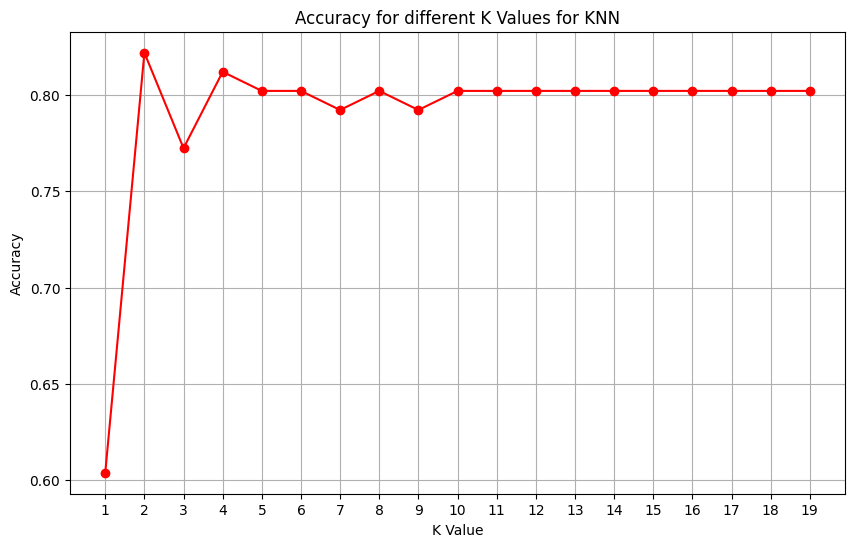

In [72]:
import matplotlib.pyplot as plt
import numpy as np

k_values = list(range(1, 20))
mean_sq_error= []

for k in k_values:
   knn_classifier = KNeighborsClassifier(n_neighbors=k)
   knn_classifier.fit(X_train, y_train)
   y_test_pred = knn_classifier.predict(X_test)
   mse = mean_squared_error(y_test,y_test_pred)
   mean_sq_error.append(mse)
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='r')
plt.title('Accuracy for different K Values for KNN')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.xticks(np.arange(1,20))
plt.grid(True)
plt.show()